In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import SpectralClustering

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python3

In [2]:
df = pd.read_csv("pIC50.csv")
df

,Unnamed: 0,cid,smiles,bioactivity,type,value (nM),pIC50
0,0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,Active,IC50,0.0138,10.860121
1,1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,Active,IC50,0.0138,10.860121
2,2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,Active,IC50,0.0378,10.422508
3,3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,Active,IC50,0.0626,10.203426
4,4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,Active,IC50,2.0000,8.698970
...,...,...,...,...,...,...,...
401,401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
402,402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
403,403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
404,404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


<Figure size 2000x2000 with 0 Axes>

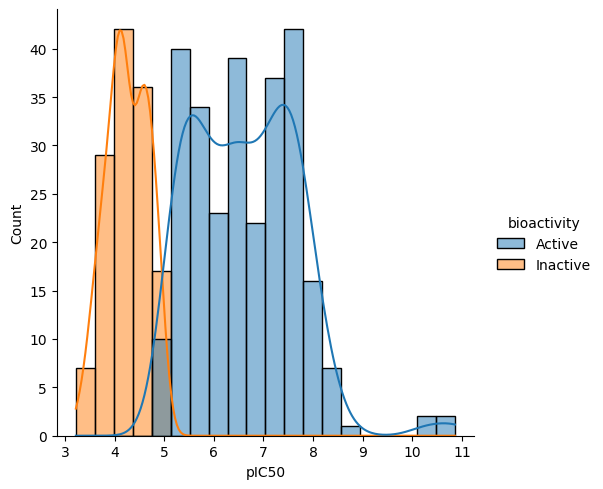

In [3]:
plt.figure(figsize=(20, 20))

sns.displot(df, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [4]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [5]:
CANNO_SMILES = canonical_smiles(df.smiles)
len(CANNO_SMILES)

406

In [6]:
df['smiles'] = CANNO_SMILES
df

,Unnamed: 0,cid,smiles,bioactivity,type,value (nM),pIC50
0,0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,Active,IC50,0.0138,10.860121
1,1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,Active,IC50,0.0138,10.860121
2,2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,Active,IC50,0.0378,10.422508
3,3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,Active,IC50,0.0626,10.203426
4,4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,Active,IC50,2.0000,8.698970
...,...,...,...,...,...,...,...
401,401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
402,402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
403,403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
404,404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


Morgan Fingerprint

In [7]:
compounds_morgan = []

for _, smiles, bioactivity, pIC50 in df[['smiles', 'bioactivity', 'pIC50']].itertuples():
    compounds_morgan.append((Chem.MolFromSmiles(smiles), bioactivity, pIC50))
compounds_morgan[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1f67d66a3b0>, 'Active', 10.860120913598765),
 (<rdkit.Chem.rdchem.Mol at 0x1f67d6689e0>, 'Active', 10.860120913598765),
 (<rdkit.Chem.rdchem.Mol at 0x1f67d6683c0>, 'Active', 10.422508200162774),
 (<rdkit.Chem.rdchem.Mol at 0x1f67d668350>, 'Active', 10.20342566678957),
 (<rdkit.Chem.rdchem.Mol at 0x1f67d668510>, 'Active', 8.698970004336019)]

In [8]:
compounds_morgan_structure = pd.DataFrame(compounds_morgan, columns=["Structure", "bioactivity", "pIC50"])
compounds_morgan_structure.head(5)

,Structure,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x000001F67D6...,Active,10.860121
1,<rdkit.Chem.rdchem.Mol object at 0x000001F67D6...,Active,10.860121
2,<rdkit.Chem.rdchem.Mol object at 0x000001F67D6...,Active,10.422508
3,<rdkit.Chem.rdchem.Mol object at 0x000001F67D6...,Active,10.203426
4,<rdkit.Chem.rdchem.Mol object at 0x000001F67D6...,Active,8.698970


In [9]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(compounds_morgan_structure.Structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 406
Fingerprint length per compound: 2048


In [10]:
fp_name_morgan = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan = [list(l) for l in mfpts]

morganfp_df = pd.DataFrame(fp_bits_morgan, index=df["bioactivity"], columns=fp_name_morgan)
morganfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
morganfp_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Active,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
morganfp_df_umap = morganfp_df.iloc[:, 1:]
morganfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


RDK5 Fingerprint

In [12]:
compounds_rdk5 = []

for _, smiles, bioactivity in df[['smiles', 'bioactivity']].itertuples():
    compounds_rdk5.append((Chem.MolFromSmiles(smiles), bioactivity))
compounds_rdk5[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1f67f823680>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1f67f8236f0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1f67f823f40>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1f67f823760>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1f67f823c30>, 'Active')]

In [13]:
compound_rdk5_structure = pd.DataFrame(compounds_rdk5, columns=["Structure", "bioactivity"])
compound_rdk5_structure

,Structure,bioactivity
0,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Active
...,...,...
401,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Inactive
402,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Inactive
403,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Inactive
404,<rdkit.Chem.rdchem.Mol object at 0x000001F67F8...,Inactive


In [14]:
def generate_rdk5(data):
    rdk5_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    rdk5_fingerprint = [rdk5_gen.GetFingerprint(mol) for mol in data]
    return rdk5_fingerprint

rdk5fp = generate_rdk5(compound_rdk5_structure.Structure[:])
print("Number of compounds converted:", len(rdk5fp))
print("Fingerprint length per compound:", len(rdk5fp[0]))

Number of compounds converted: 406
Fingerprint length per compound: 2048


In [15]:
fp_name_rdk5 = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5 = [list(l) for l in rdk5fp]

rdk5_df = pd.DataFrame(fp_bits_rdk5, index=df["bioactivity"], columns=fp_name_rdk5)
rdk5_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
rdk5_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Active,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [16]:
rdk5_df_umap = rdk5_df.iloc[:, 1:]
rdk5_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
402,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
403,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
404,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


 UMAP Morgan Fingerprint

In [55]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

In [56]:
data_umap_morgan = umapper.fit_transform(morganfp_df_umap)


In [57]:
data_umap_morgan_x = pd.DataFrame(data_umap_morgan[:, 0], columns = ['x'])
data_umap_morgan_y = pd.DataFrame(data_umap_morgan[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_morgan = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
plot_umap_morgan

,bioactivity,x,y
0,Active,8.133041,12.629872
1,Active,7.150947,14.930597
2,Active,7.213410,14.633593
3,Active,7.406426,14.389816
4,Active,9.695139,-0.625216
...,...,...,...
401,Inactive,7.054058,14.642127
402,Inactive,7.850706,13.245184
403,Inactive,8.401472,13.499196
404,Inactive,7.023235,14.800626


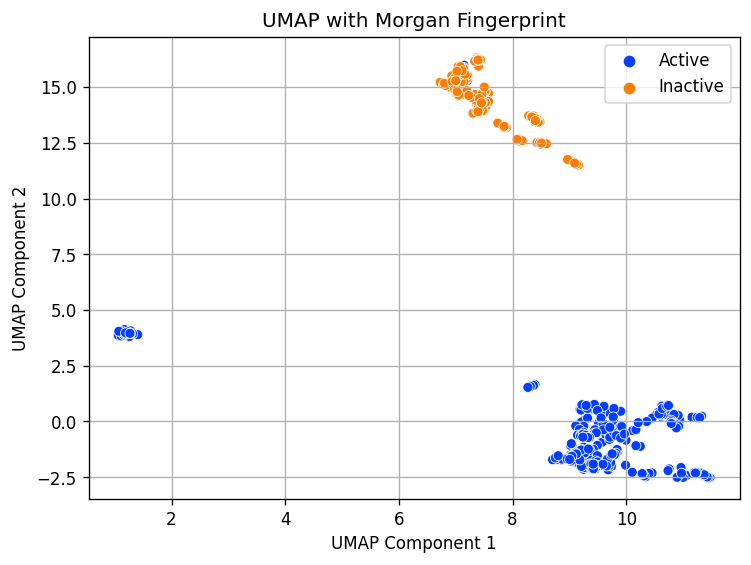

In [58]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_morgan, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Morgan Fingerprint', fontsize=12)
plt.show()

UMAP with RDK5 Fingerprint

In [59]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42,
                    )

In [60]:
data_umap_rdk5 = umapper.fit_transform(rdk5_df_umap)

In [61]:
data_umap_rdk5_x = pd.DataFrame(data_umap_rdk5[:, 0], columns = ['x'])
data_umap_rdk5_y = pd.DataFrame(data_umap_rdk5[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(rdk5_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_rdk5 = pd.concat([bioactivity, data_umap_rdk5_x, data_umap_rdk5_y], axis = 1)
plot_umap_rdk5

,bioactivity,x,y
0,Active,7.634721,-0.820363
1,Active,13.564285,-0.629351
2,Active,12.480776,1.313320
3,Active,13.654971,-0.412328
4,Active,1.360735,8.581531
...,...,...,...
401,Inactive,12.437316,1.527752
402,Inactive,12.209198,1.108529
403,Inactive,9.627057,-0.479728
404,Inactive,13.525257,-0.621144


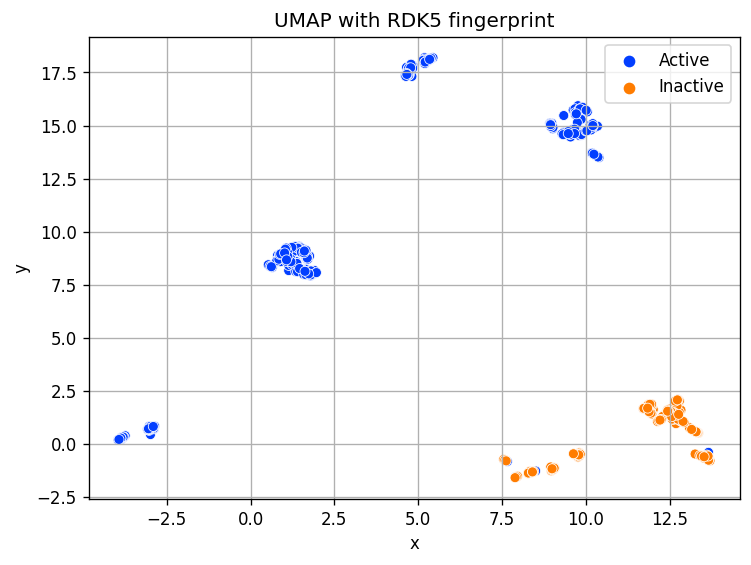

In [62]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_rdk5, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP with RDK5 fingerprint', fontsize=12)
plt.show()

Clustering by Butina of Morgan FP

In [63]:
from rdkit.ML.Cluster import Butina

In [64]:
def tanimoto_distance_matrix(fp_list):
    
    dissimilarity_matrix = []
    
    for i in range(1, len(fp_list)):
        
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [65]:
sim = DataStructs.TanimotoSimilarity(mfpts[0], mfpts[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 0.42, distance: 0.58


In [66]:
tanimoto_distance_matrix(mfpts)

[0.5842696629213483,
 0.4375,
 0.44047619047619047,
 0.5909090909090908,
 0.45238095238095233,
 0.4642857142857143,
 0.7373737373737373,
 0.7156862745098039,
 0.7128712871287128,
 0.7352941176470589,
 0.6363636363636364,
 0.42500000000000004,
 0.5119047619047619,
 0.4691358024691358,
 0.5795454545454546,
 0.7422680412371134,
 0.5116279069767442,
 0.6344086021505376,
 0.6,
 0.5730337078651686,
 0.4358974358974359,
 0.7570093457943925,
 0.6886792452830188,
 0.7339449541284404,
 0.6826923076923077,
 0.43181818181818177,
 0.5851063829787234,
 0.59375,
 0.6105263157894737,
 0.5161290322580645,
 0.63,
 0.5979381443298969,
 0.6568627450980392,
 0.3291139240506329,
 0.345679012345679,
 0.6574074074074074,
 0.6363636363636364,
 0.5681818181818181,
 0.6111111111111112,
 0.6222222222222222,
 0.5632183908045977,
 0.26086956521739135,
 0.5977011494252873,
 0.4534883720930233,
 0.5,
 0.6483516483516483,
 0.5,
 0.5934065934065934,
 0.5568181818181819,
 0.6526315789473685,
 0.16417910447761197,
 0.529

In [67]:
n = len(mfpts)

elem_triangular_matr = (n * (n - 1)) / 2

print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(mfpts) ({len(tanimoto_distance_matrix(mfpts))})",
)

Elements in the triangular matrix (82215) == tanimoto_distance_matrix(mfpts) (82215)


In [68]:
def cluster_mfpts(fingerprints, cutoff=0.3):

    distance_matrix = tanimoto_distance_matrix(mfpts)
    clusters = Butina.ClusterData(distance_matrix, len(mfpts), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

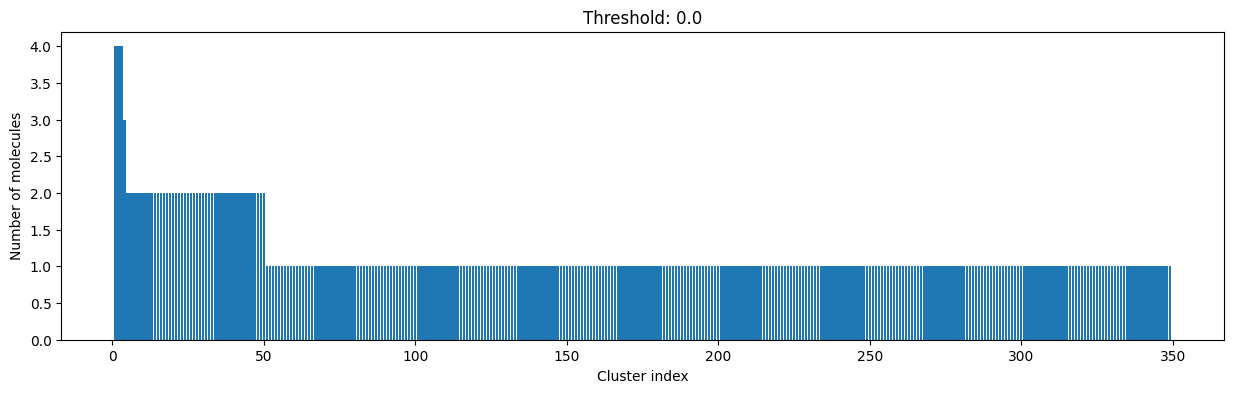

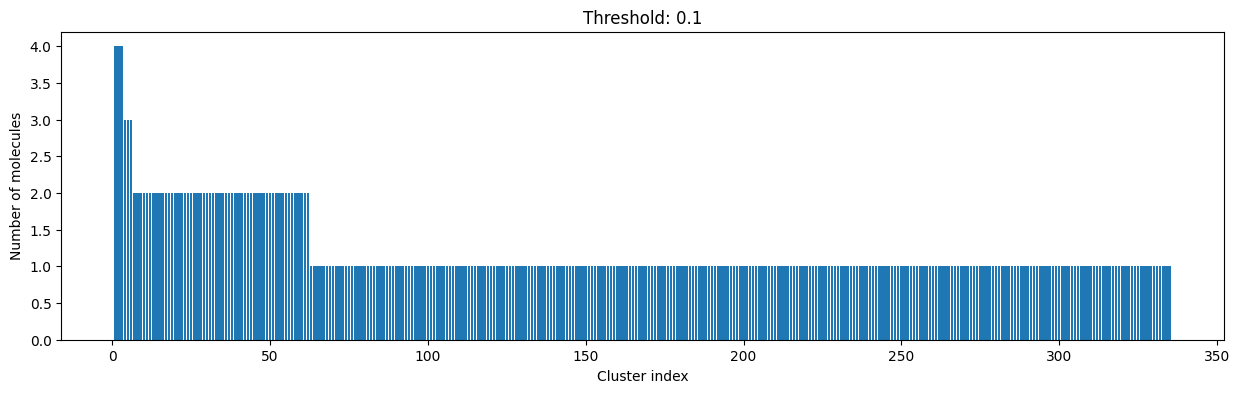

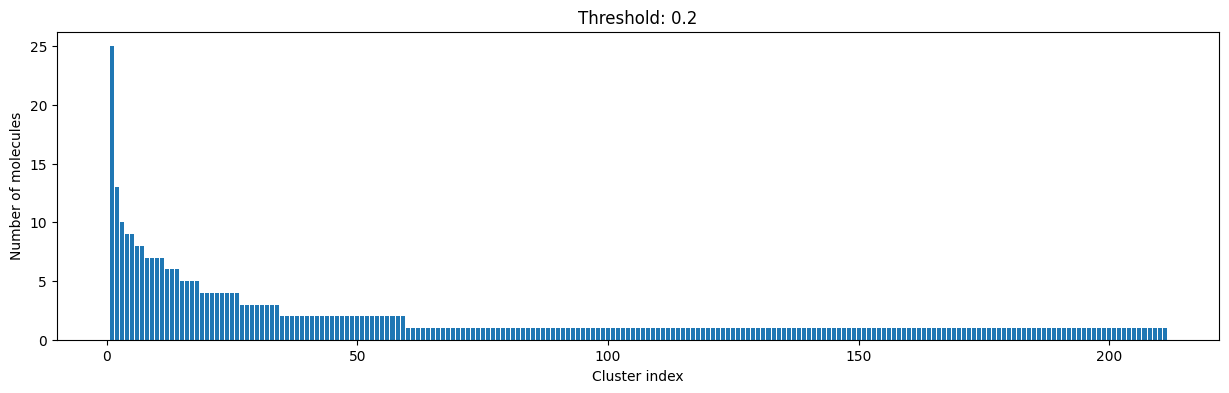

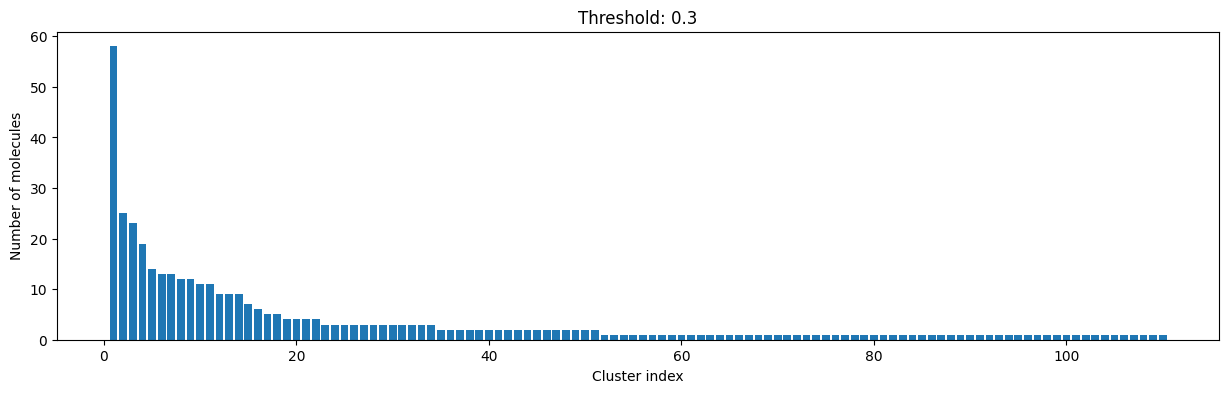

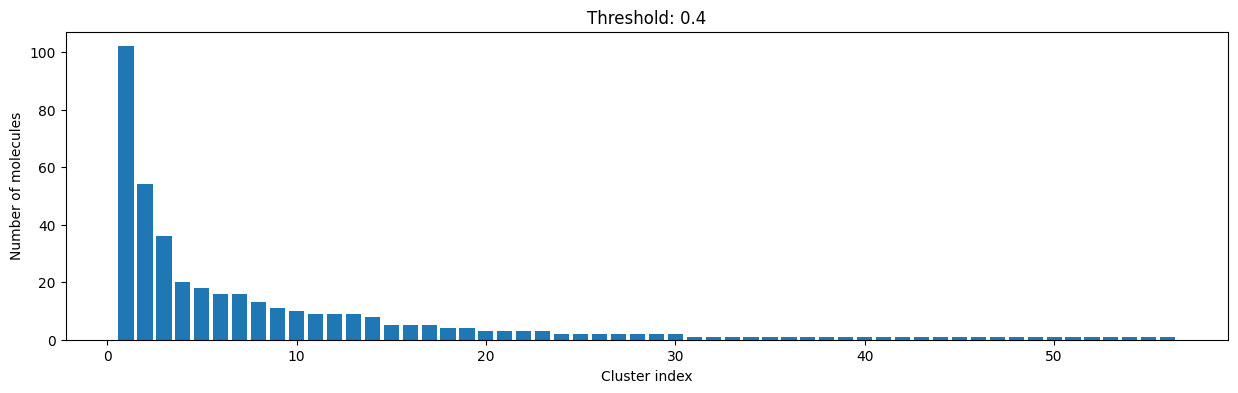

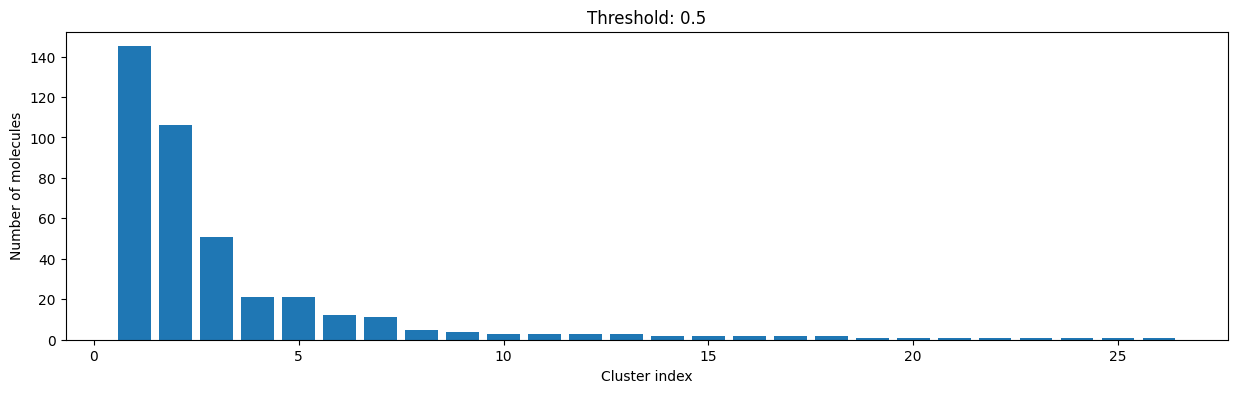

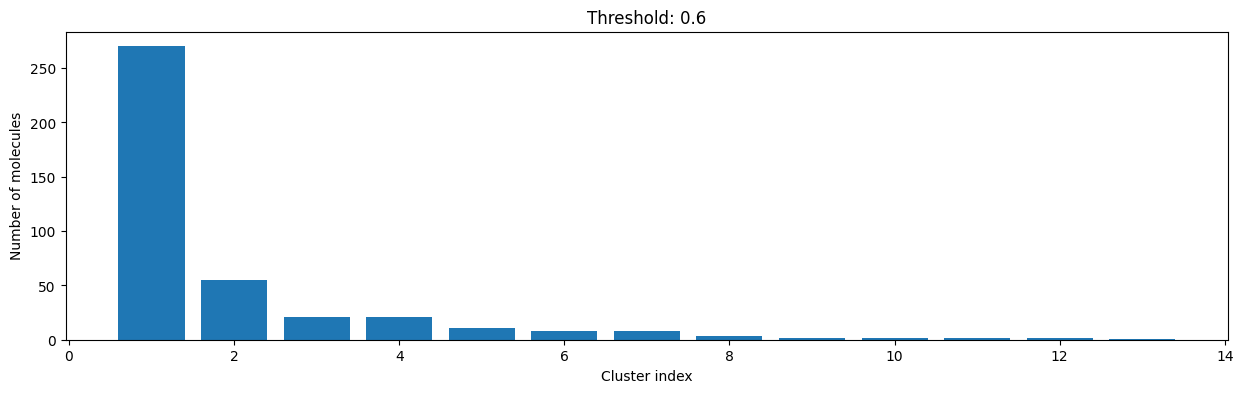

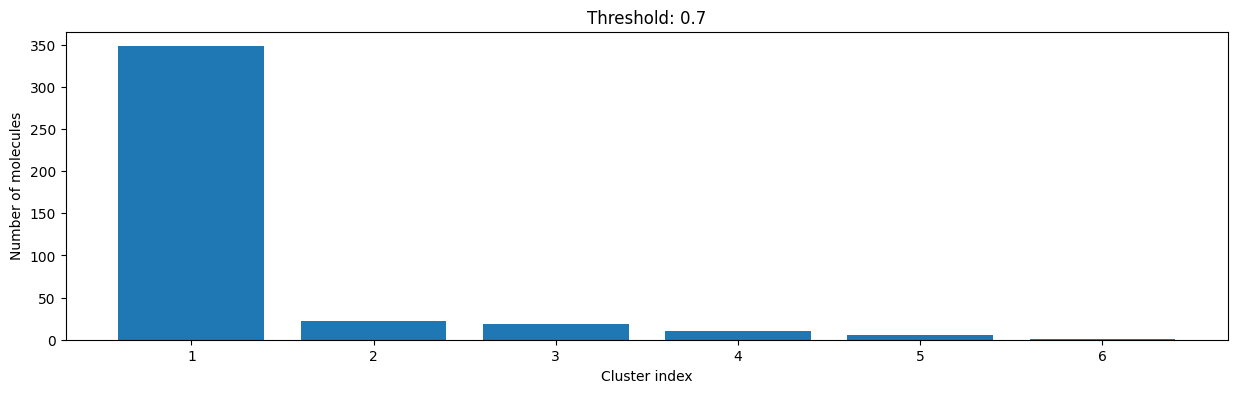

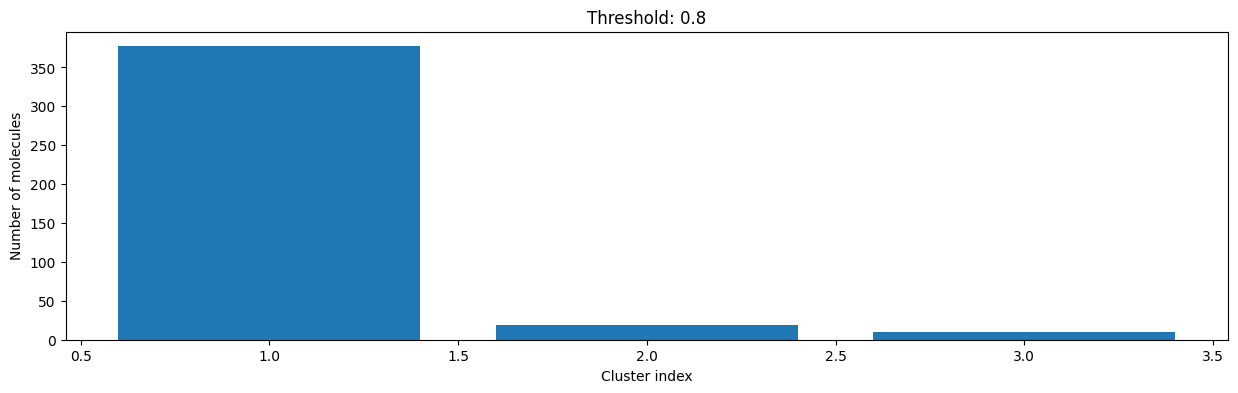

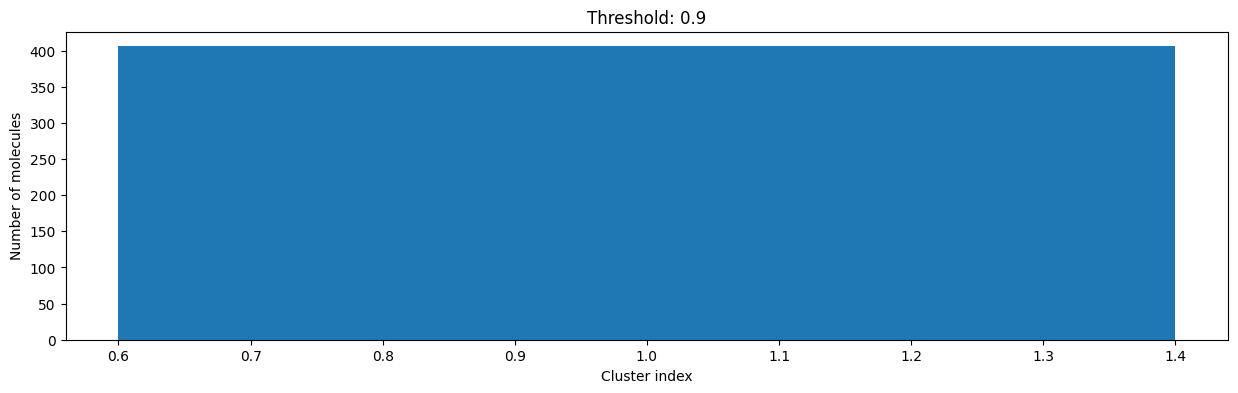

In [69]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_mfpts(mfpts, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    plt.show()

In [70]:
from sklearn.decomposition import PCA

In [71]:
data_umap_morgan

array([[ 8.133041 , 12.629872 ,  3.5366704,  5.674887 , 11.429842 ],
       [ 7.1509466, 14.930597 ,  3.3869026,  6.0852966, 11.4692   ],
       [ 7.21341  , 14.633593 ,  3.059802 ,  5.8123765, 10.937122 ],
       ...,
       [ 8.401472 , 13.499196 ,  2.838627 ,  6.0699906, 10.212026 ],
       [ 7.023235 , 14.800626 ,  3.0269916,  5.804219 , 11.221627 ],
       [ 7.4529233, 14.297009 ,  2.9622042,  5.9587603, 10.571577 ]],
      dtype=float32)

Plot Each Clusters by UMAP

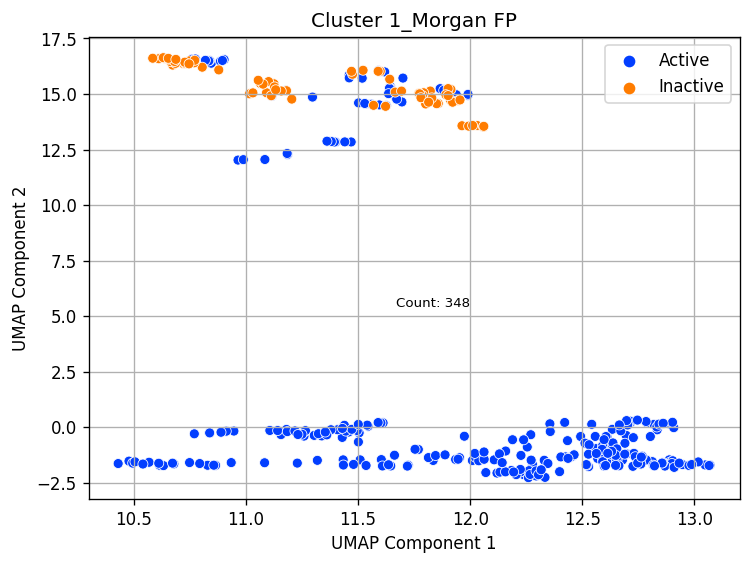

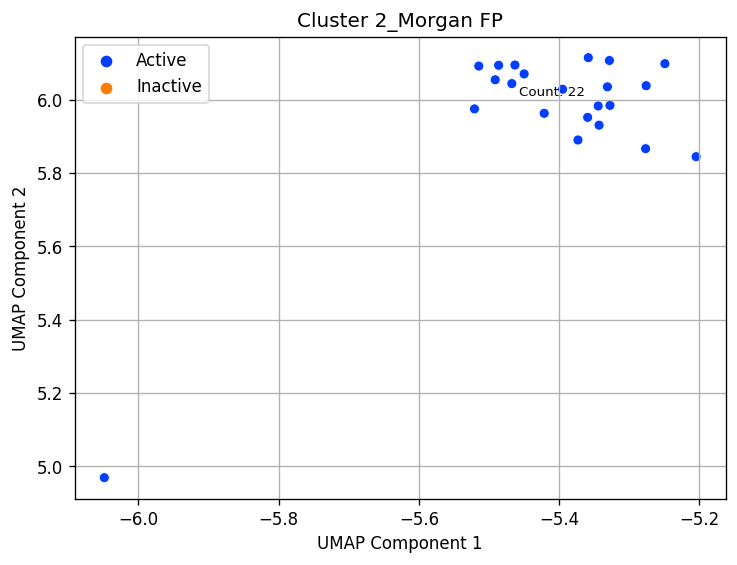

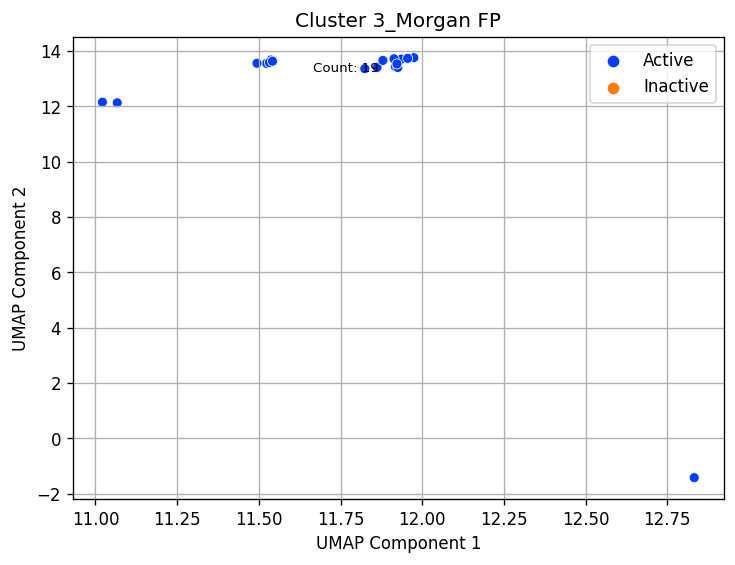

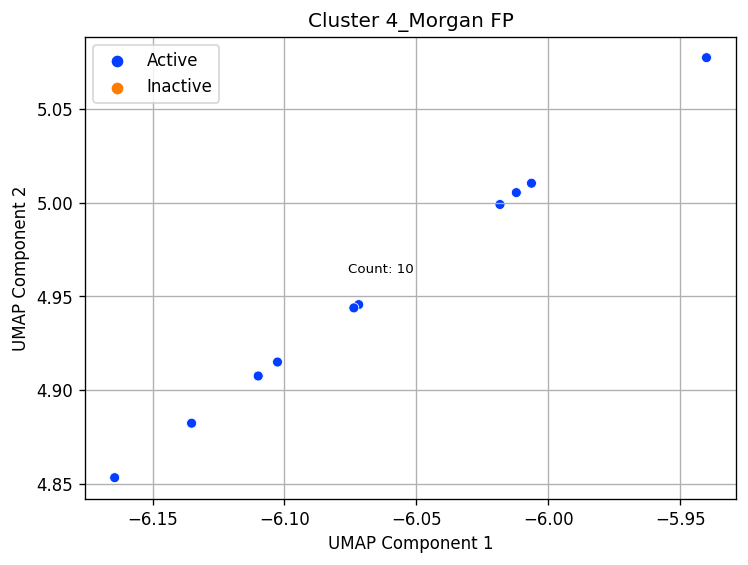

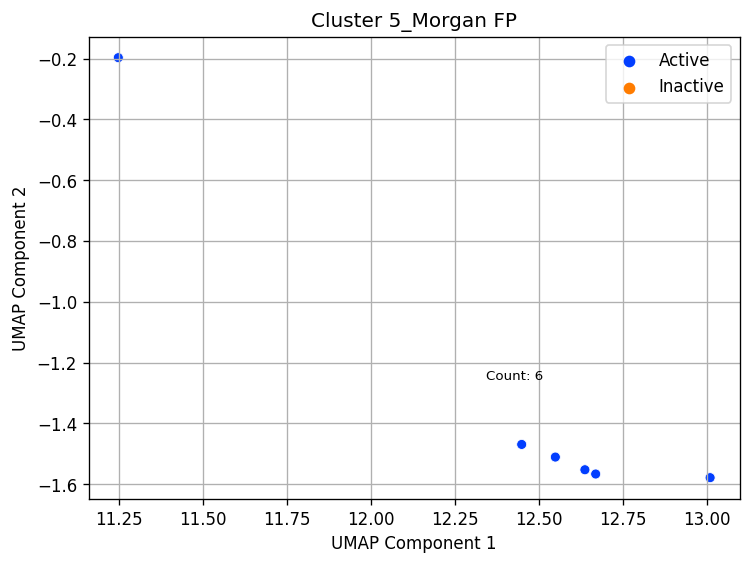

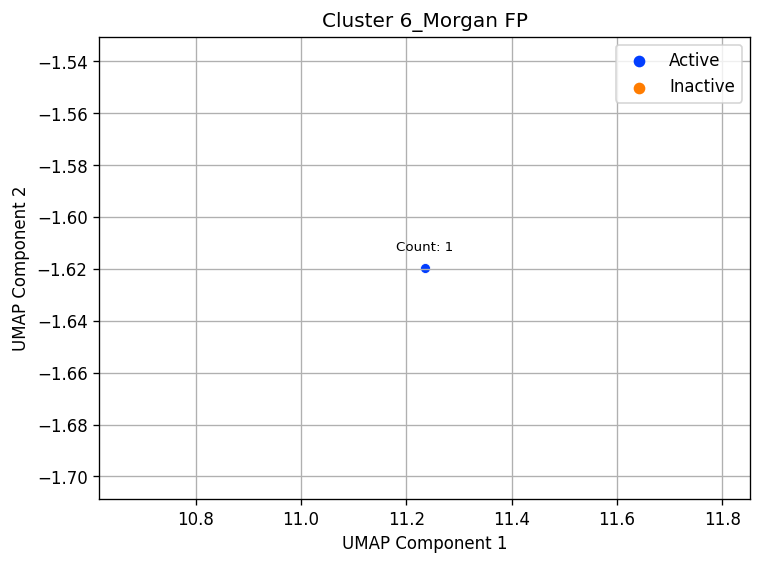

In [53]:
# Start with UMAP
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean',
                    random_state=5
                    )

data_umap_morgan = umapper.fit_transform(morganfp_df_umap)

# Apply Butina functions
cutoff = 0.7
clusters = cluster_mfpts(data_umap_morgan, cutoff=cutoff)


# Create a scatter plot using Seaborn
for cluster_index, cluster in enumerate(clusters, start=1):
    cluster_molecule_indices = cluster 
    
    cluster_coords = data_umap_morgan[cluster_molecule_indices, :]
    
    x_coords = cluster_coords[:, 0]
    y_coords = cluster_coords[:, 1]
    
    cluster_labels = np.full(len(cluster_molecule_indices), f"Cluster {cluster_index}")
    
    
    data_umap_morgan_x = pd.DataFrame(x_coords, columns = ['x'])
    data_umap_morgan_y = pd.DataFrame(y_coords, columns = ['y'])
    bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
    plot_umap_morgan_butina = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
    plot_umap_morgan_butina
    
    plt.figure(figsize=(7, 5), dpi=120)
    sns.scatterplot(x="x", y="y", hue='bioactivity' , data=plot_umap_morgan_butina, palette='bright')
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.title(f"Cluster {cluster_index}_Morgan FP")
    
    cluster_size = len(cluster_molecule_indices)
    mean_x = np.mean(data_umap_morgan[cluster_molecule_indices, 0])
    mean_y = np.mean(data_umap_morgan[cluster_molecule_indices, 1])
    plt.annotate(f"Count: {cluster_size}", (mean_x, mean_y), xytext=(0, 10),textcoords="offset points", ha='center', fontsize=8)

    plt.legend()
    plt.grid()
    plt.show()

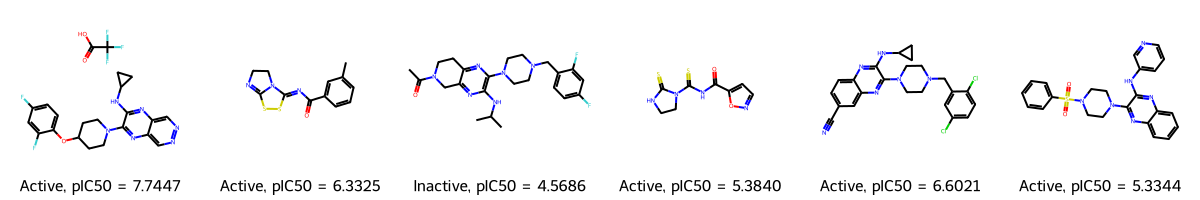

In [54]:
Draw.MolsToGridImage(
    [compounds_morgan_structure["Structure"][clusters[i][0]] for i in range(6)],
    molsPerRow=6,
    legends=[
        f"{compounds_morgan_structure['bioactivity'][clusters[i][0]]}, pIC50 = {compounds_morgan_structure['pIC50'][clusters[i][0]]:.4f}"
        for i in range(6)]
)